In [1]:
import os
import sys
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import argparse
import geojson

# import drought indicies
from climate_drought import drought_indices as dri, config

INDEX_MAP = {
    'SPI_ECMWF': dri.SPI_ECMWF,
    'SPI_GDO': dri.SPI_GDO,
    'SPI_NCG': dri.SPI_NCG,
    'SMA_ECMWF': dri.SMA_ECMWF,
    'SMA_GDO': dri.SMA_GDO,
    'fAPAR': dri.FPAR_GDO,
    'CDI': dri.CDI,
    'FEATURE_SAFE': dri.FEATURE_SAFE,
    'UTCI': dri.UTCI
}


In [2]:
class Drought:
    def __init__(self,product,latitude,longitude,start_date,end_date):
        # Setup paramaters
        self.verbose = True

        self.indir = '/home/jovyan/climate-input'
        self.outdir = '/home/jovyan/climate-output'
        self.oformat = 'GeoJSON'
        self.product = product
        self.start_date = start_date
        self.end_date = end_date
        
        # Convert latitude and longitude strings to lists
        self.latitude = [float(item) for item in latitude.replace('[','').replace(']','').split(',')]
        self.longitude = [float(item) for item in longitude.replace('[','').replace(']','').split(',')]

        # setup config and args
        self.cfg = config.Config(self.outdir,self.indir)
        self.args = config.AnalysisArgs(latitude,longitude,
            start_date,end_date,product=product,oformat=self.oformat)


In [3]:
product = "UTCI"
latitude = '52.5' 
longitude = '1.25'
start_date = '20220101'
end_date = '20241231'

print("Running {} for {} {} from {} to {}".format(product, 
    latitude, longitude, start_date, end_date))
 
obj = Drought(product,latitude,longitude,start_date,end_date)

Running UTCI for 52.5 1.25 from 20220101 to 20241231


In [4]:
# Run processing
def drought_index(obj) -> dri.DroughtIndex:
   return INDEX_MAP[obj.product](obj.cfg, obj.args)

idx = drought_index(obj)

print("Computing {} index for {} to {}.".format(obj.product, 
    obj.cfg.baseline_start, obj.cfg.baseline_end))

if os.path.exists(idx.output_file_path):
    print("Processed file '{}' already exists.".format(idx.output_file_path))
else:
    idx.download()
    idx.process()
    print("Downloading and processing complete for '{}' completed with format {}.".format(idx.output_file_path, obj.oformat))

if os.path.exists(idx.output_file_path):
    exit_code = 1
    print("{} processing complete, generated {}".format(product, idx.output_file_path))

else:
    print("Processing failed, {} does not exist".format(idx.output_file_path))


2025-01-13  20:06:49 INFO Downloaded file '/home/jovyan/climate-output/precip_19850101-20241231_52.40-52.60_1.15-1.35_monthly.nc' already exists.
2025-01-13  20:06:49 INFO Initiating processing of ERA5 & UTCI monthly data.


Computing UTCI index for 19850101 to 20241231.


2025-01-13  20:06:49 DEBUG Precip xarray:
2025-01-13  20:06:49 DEBUG <xarray.Dataset>
Dimensions:    (time: 479, latitude: 3, longitude: 3)
Coordinates:
    number     (time) int64 ...
  * time       (time) datetime64[ns] 1985-01-01 1985-02-01 ... 2024-02-01
  * latitude   (latitude) float64 52.6 52.5 52.4
  * longitude  (longitude) float64 1.15 1.25 1.35
    expver     (time) object ...
Data variables:
    tp         (time, latitude, longitude) float32 ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
2025-01-13  20:06:49 INFO 

2025-01-13  20:06:49 DEBUG scaled values: 0.002 0.012
2025-01-13  20:06:49 DEBUG alphas: 10.056 15.874 betas: 0.000 0.001
2025-01-13  20:06:49 INFO Input precipitation, 479 values: 0.000 0.005 
2025-01-13  20:06:49 INFO SPI, 479 values: 

Requesting: {'variable': ['universal_thermal_climate_index', 'mean_radiant_temperature'], 'version': '1_1', 'product_type': 'consolidated_dataset', 'year': ['2024'], 'month': ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'], 'day': ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31'], 'area': ['52.6', ' 1.15', ' 52.4', ' 1.35']}
Aborting as API request has issues
UTCI output file '/home/jovyan/climate-output/utci_20220101-20241231_52.40-52.60_1.15-1.35_daily.nc' could not be located.
Requesting: {'product_type': 'reanalysis', 'variable': ['10m_v_component_of_wind', 'mean_surface_downward_long_wave_radiation_flux', '2m_dewpoint_temperature', '2m_temperature', 'mean_surface_downward_short_wave_radiation_flux', 'mean_surface_net_short_wave_radiation_flux', '10m_u_component_of_wind', 'mean_surface_net_long_wave_radiation_flux'], 'year

2025-01-13 20:06:50,701 INFO [2025-01-09T00:00:00] Please be aware that ERA5 data from 1st January 2025 was degraded and is being corrected. Watch the [Forum announcement](https://forum.ecmwf.int/t/era5-data-from-1st-january-2025-was-degraded-and-is-being-corrected/10689) for updates.
2025-01-13  20:06:50 INFO [2025-01-09T00:00:00] Please be aware that ERA5 data from 1st January 2025 was degraded and is being corrected. Watch the [Forum announcement](https://forum.ecmwf.int/t/era5-data-from-1st-january-2025-was-degraded-and-is-being-corrected/10689) for updates.
2025-01-13 20:06:50,703 INFO Request ID is f928abfa-65b5-47c5-8de9-e9de725e3b70
2025-01-13  20:06:50 INFO Request ID is f928abfa-65b5-47c5-8de9-e9de725e3b70
2025-01-13 20:06:50,810 INFO status has been updated to accepted
2025-01-13  20:06:50 INFO status has been updated to accepted
2025-01-13 20:06:59,236 INFO status has been updated to running
2025-01-13  20:06:59 INFO status has been updated to running
2025-01-13 20:13:09,80

13fc1c58fbd858149719abefaa303645.zip:   0%|          | 0.00/217k [00:00<?, ?B/s]

Extraction of /home/jovyan/climate-output/multi_20220101-20241231_52.40-52.60_1.15-1.35_hourly and merging 2 .nc files: ['/home/jovyan/climate-output/multi_20220101-20241231_52.40-52.60_1.15-1.35_hourly/data_stream-oper_stepType-avg.nc', '/home/jovyan/climate-output/multi_20220101-20241231_52.40-52.60_1.15-1.35_hourly/data_stream-oper_stepType-instant.nc']
Requesting: {'product_type': 'reanalysis', 'variable': ['10m_v_component_of_wind', 'mean_surface_downward_long_wave_radiation_flux', '2m_dewpoint_temperature', '2m_temperature', 'mean_surface_downward_short_wave_radiation_flux', 'mean_surface_net_short_wave_radiation_flux', '10m_u_component_of_wind', 'mean_surface_net_long_wave_radiation_flux'], 'year': '2022', 'month': '2', 'day': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], 'time': ['19:00', '10:00', '08:00', '09:00', '05:00', '22:00', '02:00', '15:00', '11:00', '23:00', '21:00', '16:00', '20:00', '03:00', '00:

2025-01-13 20:13:10,985 INFO [2025-01-09T00:00:00] Please be aware that ERA5 data from 1st January 2025 was degraded and is being corrected. Watch the [Forum announcement](https://forum.ecmwf.int/t/era5-data-from-1st-january-2025-was-degraded-and-is-being-corrected/10689) for updates.
2025-01-13  20:13:10 INFO [2025-01-09T00:00:00] Please be aware that ERA5 data from 1st January 2025 was degraded and is being corrected. Watch the [Forum announcement](https://forum.ecmwf.int/t/era5-data-from-1st-january-2025-was-degraded-and-is-being-corrected/10689) for updates.
2025-01-13 20:13:10,986 INFO Request ID is 574b7b99-1438-4724-b2cf-895665ec1142
2025-01-13  20:13:10 INFO Request ID is 574b7b99-1438-4724-b2cf-895665ec1142
2025-01-13 20:13:11,057 INFO status has been updated to accepted
2025-01-13  20:13:11 INFO status has been updated to accepted
2025-01-13 20:13:19,482 INFO status has been updated to running
2025-01-13  20:13:19 INFO status has been updated to running
2025-01-13 20:19:30,09

e30e5633f705659af4d3d03441316a36.zip:   0%|          | 0.00/212k [00:00<?, ?B/s]

Extraction of /home/jovyan/climate-output/multi_20220101-20241231_52.40-52.60_1.15-1.35_hourly and merging 2 .nc files: ['/home/jovyan/climate-output/multi_20220101-20241231_52.40-52.60_1.15-1.35_hourly/data_stream-oper_stepType-avg.nc', '/home/jovyan/climate-output/multi_20220101-20241231_52.40-52.60_1.15-1.35_hourly/data_stream-oper_stepType-instant.nc']
Requesting: {'product_type': 'reanalysis', 'variable': ['10m_v_component_of_wind', 'mean_surface_downward_long_wave_radiation_flux', '2m_dewpoint_temperature', '2m_temperature', 'mean_surface_downward_short_wave_radiation_flux', 'mean_surface_net_short_wave_radiation_flux', '10m_u_component_of_wind', 'mean_surface_net_long_wave_radiation_flux'], 'year': '2022', 'month': '3', 'day': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], 'time': ['19:00', '10:00', '08:00', '09:00', '05:00', '22:00', '02:00', '15:00', '11:00', '23:00', '21:00', '16:00', '20:00', '03:00', '00:

2025-01-13 20:19:31,151 INFO [2025-01-09T00:00:00] Please be aware that ERA5 data from 1st January 2025 was degraded and is being corrected. Watch the [Forum announcement](https://forum.ecmwf.int/t/era5-data-from-1st-january-2025-was-degraded-and-is-being-corrected/10689) for updates.
2025-01-13  20:19:31 INFO [2025-01-09T00:00:00] Please be aware that ERA5 data from 1st January 2025 was degraded and is being corrected. Watch the [Forum announcement](https://forum.ecmwf.int/t/era5-data-from-1st-january-2025-was-degraded-and-is-being-corrected/10689) for updates.
2025-01-13 20:19:31,153 INFO Request ID is 24069785-10fd-46f7-865b-1415c7ae64e0
2025-01-13  20:19:31 INFO Request ID is 24069785-10fd-46f7-865b-1415c7ae64e0
2025-01-13 20:19:31,254 INFO status has been updated to accepted
2025-01-13  20:19:31 INFO status has been updated to accepted
2025-01-13 20:19:39,645 INFO status has been updated to running
2025-01-13  20:19:39 INFO status has been updated to running
2025-01-13 20:23:50,05

24345fd03f7d329a6e4f0a96b5334c4e.zip:   0%|          | 0.00/217k [00:00<?, ?B/s]

Extraction of /home/jovyan/climate-output/multi_20220101-20241231_52.40-52.60_1.15-1.35_hourly and merging 2 .nc files: ['/home/jovyan/climate-output/multi_20220101-20241231_52.40-52.60_1.15-1.35_hourly/data_stream-oper_stepType-avg.nc', '/home/jovyan/climate-output/multi_20220101-20241231_52.40-52.60_1.15-1.35_hourly/data_stream-oper_stepType-instant.nc']


2025-01-13  20:23:51 INFO C3S data was downloaded to '/home/jovyan/climate-output/multi_20220101-20241231_52.40-52.60_1.15-1.35_hourly.nc'.


Downloaded data was saved to '/home/jovyan/climate-output/multi_20220101-20241231_52.40-52.60_1.15-1.35_hourly.nc'.
UTCI input file /home/jovyan/climate-output/multi_20220101-20241231_52.40-52.60_1.15-1.35_hourly.nc exists
<xarray.Dataset>
Dimensions:    (time: 26304, latitude: 1, longitude: 1)
Coordinates:
  * time       (time) datetime64[ns] 2024-01-01 ... 2023-12-31T23:00:00
  * latitude   (latitude) float64 52.4
  * longitude  (longitude) float64 1.15
Data variables:
    msnswrf    (time, latitude, longitude) float32 ...
    msdwswrf   (time, latitude, longitude) float32 ...
    msdwlwrf   (time, latitude, longitude) float32 ...
    msnlwrf    (time, latitude, longitude) float32 ...
    d2m        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    u10        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
Calculating UTCI using: ['msnswrf', 'msdwswrf', 'msdwlwrf', 'msnlwrf', 'd2m', 'v10',

/home/jovyan/Climate-drought/climate_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:45: UserWarning: Variable does not have a `standard_name` attribute.
  check_valid(vardata, "standard_name", data["standard_name"])


MRT: 256.656 441.379 K
UTCI: -23.648 37.778 °C
UTCI merged:  <xarray.Dataset>
Dimensions:    (time: 35, longitude: 479, latitude: 479)
Coordinates:
  * time       (time) datetime64[ns] 2024-03-01 2024-04-01 ... 2024-02-01
  * longitude  (longitude) <U4 '1.25' '1.25' '1.25' ... '1.25' '1.25' '1.25'
  * latitude   (latitude) <U4 '52.5' '52.5' '52.5' ... '52.5' '52.5' '52.5'
Data variables:
    tp         (time) float32 0.001641 0.002709 0.00309 ... 0.0007397 0.002071
    spi        (time) float64 -0.6193 0.1909 0.9805 ... -0.7664 -1.326 -0.748
    utci       (time) float64 9.333 11.1 20.97 21.71 ... 7.147 3.3 1.032 6.491
Health index: -2.000 3.000


2025-01-13  20:24:02 INFO Generating output...


UTCI processing complete, generated /home/jovyan/climate-output/utci_20220101-20241231_52.50_1.25.json


In [5]:
import geopandas as gpd

# Load in data and display then plot
df = gpd.read_file(idx.output_file_path)
print(df)


         _date        tp       spi       utci  hindex  \
0   2022-01-01  0.000822 -1.028419   5.175754    -1.0   
1   2022-02-01  0.002270  0.058928   1.958764    -2.0   
2   2022-03-01  0.001555 -0.520272  11.282239     0.0   
3   2022-04-01  0.000920 -0.191420  13.031589     0.0   
4   2022-05-01  0.002657  0.020361  20.214244     0.0   
5   2022-06-01  0.002354  0.226004  22.569489     0.0   
6   2022-07-01  0.000651 -0.316514  26.594804     2.0   
7   2022-08-01  0.002398 -0.710603  27.531813     2.0   
8   2022-09-01  0.001198 -1.508189  20.205021     2.0   
9   2022-10-01  0.000909 -1.133661  17.456207     1.0   
10  2022-11-01  0.002387 -1.129934   9.662833     1.0   
11  2022-12-01  0.000817 -1.481011   3.638815    -1.0   
12  2023-01-01  0.000808 -1.137705   3.505965    -1.0   
13  2023-02-01  0.000181 -2.934126   7.993990     1.0   
14  2023-03-01  0.001653 -2.468714   6.233603     1.0   
15  2023-04-01  0.001200 -1.691317  11.985778     2.0   
16  2023-05-01  0.000824 -0.984

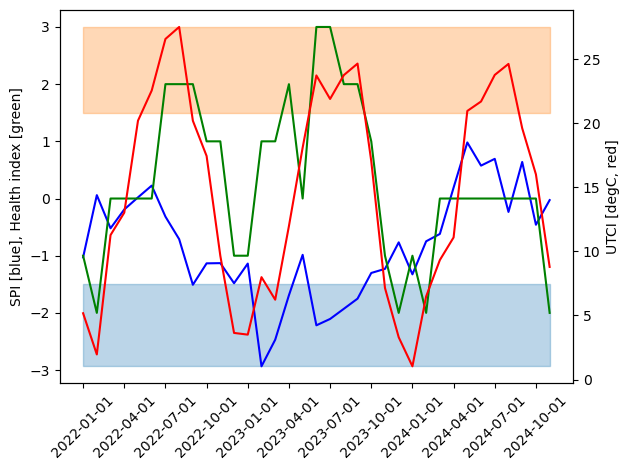

In [8]:
# plotting

fig, ax1 = plt.subplots()
ax1.plot(df._date,df.spi,color='b',label='spi')
ax1.set_ylabel('SPI [blue]')
tick_list = df._date.values[::3]
plt.xticks(rotation=45, ticks=tick_list)
minv = np.nanmin([np.nanmin(df.hindex),np.nanmin(df.spi)])
maxv = np.nanmax([np.nanmax(df.hindex),np.nanmax(df.spi)])
if product == 'UTCI':
    ax1.plot(df._date,df.hindex,color='g',label='utci')
    ax1.set_ylabel('SPI [blue], Health index [green]')
    ax2 = ax1.twinx()
    ax2.plot(df._date, df.utci, color = 'r', label = 'utci')
    ax2.set_ylabel('UTCI [degC, red]')
    ax1.fill_between(df._date,1.5,maxv, 
                     color = 'C1', alpha=0.3, interpolate = True)
    ax1.fill_between(df._date,-1.5,minv, 
                     color = 'C0', alpha=0.3, interpolate = True)
plt.tight_layout()
plt.show()      